In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [133]:
pd.options.display.max_columns = 0
pd.options.display.max_rows = 20


In [6]:
listings = pd.read_csv("datasets/listings.csv")
listings.shape

(59824, 29)

In [5]:
listings.head()

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,host_id,id,instant_bookable,latitude,longitude,metropolitan,name,price,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode
0,2.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",24,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,119445,7949480,f,40.852054,-73.788680,NYC,City Island Sanctuary relaxing BR & Bath w Par...,99.0,House,10.0,10.0,10.0,10.0,100.0,10.0,Private room,NY,NaN,10464
1,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",30,1.0,Real Bed,1.0,1.0,flexible,sunnysidebronx,NaN,9117975,16042478,t,40.853491,-73.788607,NYC,WATERFRONT STUDIO APARTMENT,200.0,Apartment,NaN,NaN,NaN,NaN,NaN,NaN,Private room,NY,NaN,10464
2,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,3.0,Real Bed,3.0,3.0,strict,sunnysidebronx,NaN,9815788,1886820,f,40.841144,-73.783052,NYC,Quaint City Island Community.,300.0,House,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,10464
3,3.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",8,1.0,Real Bed,1.0,1.0,strict,long island city,NaN,13886510,6627449,f,40.849775,-73.786609,NYC,Large 1 BDRM in Great location,125.0,Apartment,10.0,10.0,10.0,10.0,93.0,10.0,Entire home/apt,NY,775.0,10464
4,4.0,"{Internet,""Wireless Internet"",""Air conditionin...",17,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,28811542,5557381,t,40.850024,-73.789328,NYC,Quaint City Island Home,69.0,House,10.0,10.0,10.0,10.0,97.0,10.0,Private room,NY,350.0,10464


In [8]:
listings.describe(include = 'all')

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,host_id,id,instant_bookable,latitude,longitude,metropolitan,name,price,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode
count,59763.000000,59824,59824.000000,59622.000000,59824,59729.000000,59715.000000,59824,59778,0.0,5.982400e+04,5.982400e+04,59824,59824.000000,59824.000000,59824,59783,59824.000000,59820,45478.000000,45544.000000,45539.000000,45475.000000,45624.000000,45470.000000,59824,59824,13438.000000,58998
unique,NaN,51780,NaN,NaN,5,NaN,NaN,7,133,NaN,NaN,NaN,2,NaN,NaN,5,58689,NaN,32,NaN,NaN,NaN,NaN,NaN,NaN,3,9,NaN,474
top,NaN,{},NaN,NaN,Real Bed,NaN,NaN,strict,new york,NaN,NaN,NaN,f,NaN,NaN,NYC,DRIFTER INN Rockaway Beach,NaN,Apartment,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,11211
freq,NaN,383,NaN,NaN,57988,NaN,NaN,25278,19566,NaN,NaN,NaN,47009,NaN,NaN,40740,12,NaN,46149,NaN,NaN,NaN,NaN,NaN,NaN,32103,40738,NaN,2043
mean,3.031960,NaN,7.976448,1.183447,NaN,1.221969,1.626107,NaN,NaN,NaN,3.100695e+07,1.007171e+07,NaN,40.651362,-76.674881,NaN,NaN,159.009378,NaN,9.738555,9.289786,9.758624,9.463002,93.474750,9.384891,NaN,NaN,856.471201,NaN
std,1.999427,NaN,10.062641,0.483726,NaN,0.775982,1.128178,NaN,NaN,NaN,3.216733e+07,5.507015e+06,NaN,0.862090,7.139989,NaN,NaN,236.200222,NaN,0.662886,1.066889,0.645440,0.818924,8.240908,0.874256,NaN,NaN,712.856777,NaN
min,1.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,7.200000e+01,5.900000e+02,NaN,38.823403,-105.094563,NaN,NaN,0.000000,NaN,2.000000,2.000000,2.000000,2.000000,20.000000,2.000000,NaN,NaN,70.000000,NaN
25%,2.000000,NaN,0.000000,1.000000,NaN,1.000000,1.000000,NaN,NaN,NaN,5.453285e+06,5.477726e+06,NaN,40.673848,-76.981725,NaN,NaN,70.000000,NaN,10.000000,9.000000,10.000000,9.000000,90.000000,9.000000,NaN,NaN,450.000000,NaN
50%,2.000000,NaN,3.000000,1.000000,NaN,1.000000,1.000000,NaN,NaN,NaN,1.965590e+07,1.022793e+07,NaN,40.722133,-73.972984,NaN,NaN,109.000000,NaN,10.000000,10.000000,10.000000,10.000000,96.000000,10.000000,NaN,NaN,675.000000,NaN
75%,4.000000,NaN,13.000000,1.000000,NaN,1.000000,2.000000,NaN,NaN,NaN,4.667932e+07,1.505785e+07,NaN,40.791820,-73.942720,NaN,NaN,176.000000,NaN,10.000000,10.000000,10.000000,10.000000,100.000000,10.000000,NaN,NaN,1000.000000,NaN


## Prices Distribution for property type

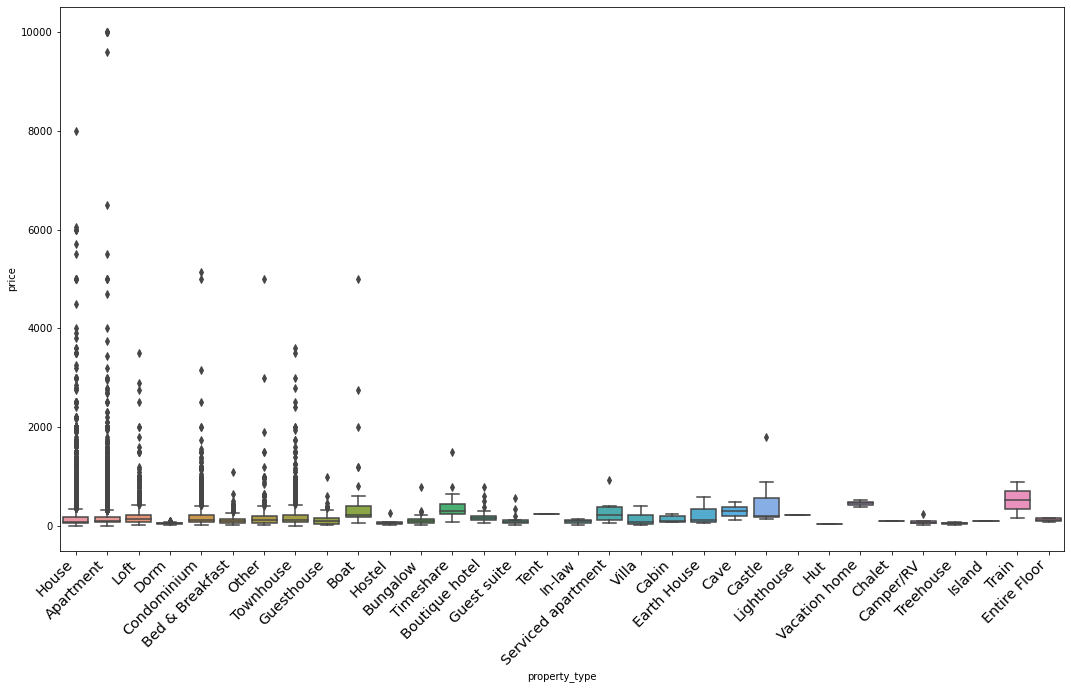

In [48]:

plt.figure(figsize=(18,10))
sns.boxplot(x="property_type", y="price", #hue="zipcode",
                 data=listings)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

## Count property types 

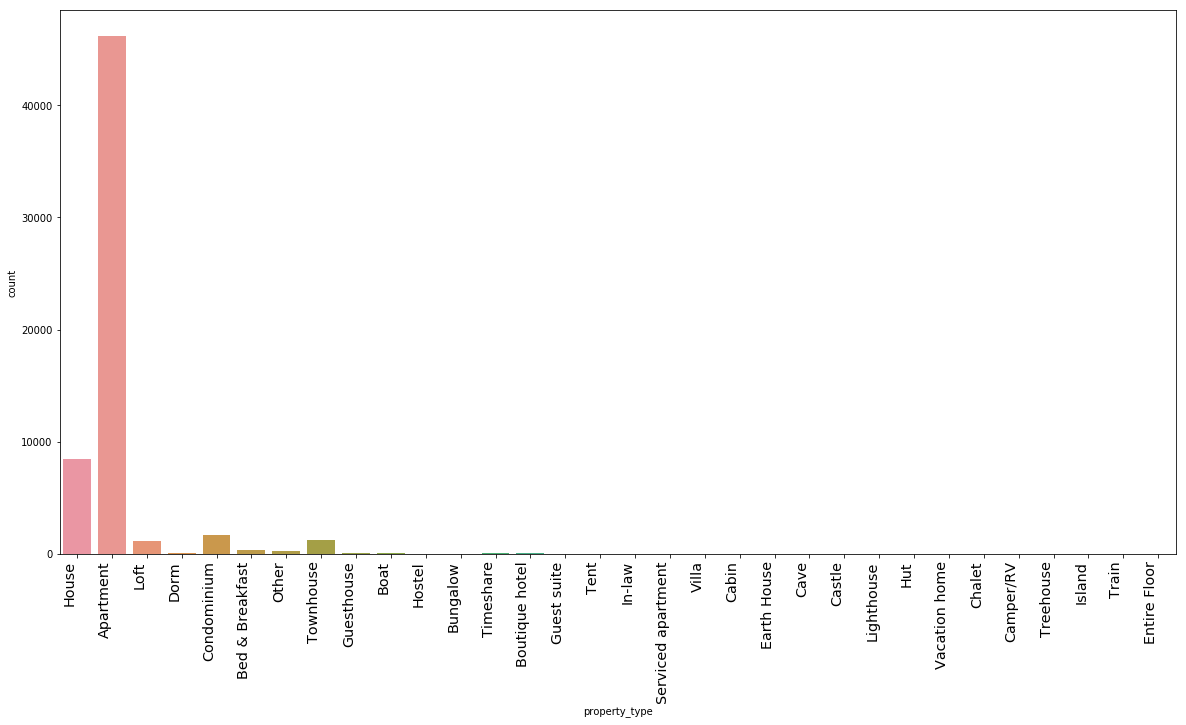

In [11]:
plt.figure(figsize=(20, 10))
sns.countplot('property_type',data=listings)
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

In [54]:
listings.groupby("property_type")["price"].count().sort_values(ascending = False)
#we need to use only some property types

property_type
Apartment             46149
House                  8466
Condominium            1723
Townhouse              1282
Loft                   1109
Bed & Breakfast         339
Other                   300
Guesthouse               77
Dorm                     72
Timeshare                43
Boutique hotel           42
Boat                     38
Bungalow                 33
Villa                    30
Hostel                   27
Guest suite              25
In-law                   15
Serviced apartment       10
Camper/RV                 8
Castle                    7
Cabin                     5
Entire Floor              4
Earth House               3
Treehouse                 2
Cave                      2
Train                     2
Vacation home             2
Chalet                    1
Tent                      1
Island                    1
Lighthouse                1
Hut                       1
Name: price, dtype: int64

In [14]:
#listings[listings['property_type'] == 'Entire Floor']
#listings[listings['property_type'] == 'Cabin']
#listings[listings['property_type'] == 'Serviced apartment']


## Look into a few property types

In [161]:
listings_filt = (listings[listings['property_type'].isin(['Apartment',
'House',
'Condominium',
'Townhouse',
'Loft',
'Bed & Breakfast'])])

In [162]:
listings_filt.groupby("property_type")["price"].describe().sort_values(by="std")

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
Bed & Breakfast,339.0,125.321534,100.509176,28.0,70.0,99.0,150.0,1100.0
Apartment,46149.0,148.611909,192.261521,0.0,75.0,110.0,175.0,10000.0
Loft,1109.0,206.237151,272.603053,14.0,80.0,135.0,220.0,3500.0
Condominium,1723.0,208.547301,284.798842,14.0,85.0,130.0,220.0,5150.0
Townhouse,1282.0,209.058502,305.368229,10.0,75.0,120.0,220.0,3600.0
House,8466.0,189.349870,370.762770,0.0,60.0,90.0,177.0,8000.0


### Distribution by state, only apartment

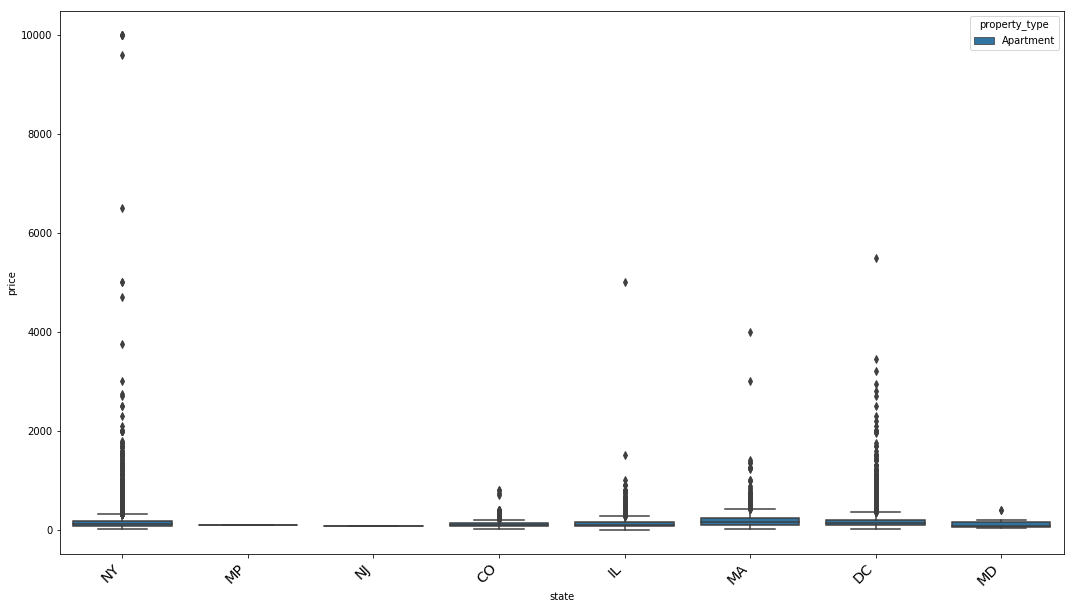

In [163]:

plt.figure(figsize=(18,10))
sns.boxplot(x="state", y="price", hue="property_type",
                 data=listings_filt[listings_filt['property_type'] == "Apartment"])
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

### cleaning the ```zipcode``` column 

In [79]:
#first a test
test = pd.DataFrame({'zipcode' : list(listings_filt['zipcode'].unique())})
test = test.dropna()
test = test[test['zipcode'].str.isdigit() == False]
test['zipcode_clean'] = test['zipcode'].str.slice(0,5)
test.reset_index(drop = True)


,zipcode,zipcode_clean
0,11103-3233,11103
1,11426-1175,11426
2,10003-8623,10003
3,11355.0,11355
4,11354.0,11354
5,11365.0,11365
6,11358.0,11358
7,11366.0,11366
8,11367.0,11367
9,11435.0,11435


In [164]:
listings_filt['zipcode_clean'] = list(listings_filt['zipcode'].str.slice(0,5))
listings_filt.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,host_id,id,instant_bookable,latitude,longitude,metropolitan,name,price,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode,zipcode_clean
0,2.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",24,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,119445,7949480,f,40.852054,-73.788680,NYC,City Island Sanctuary relaxing BR & Bath w Par...,99.0,House,10.0,10.0,10.0,10.0,100.0,10.0,Private room,NY,NaN,10464,10464
1,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",30,1.0,Real Bed,1.0,1.0,flexible,sunnysidebronx,NaN,9117975,16042478,t,40.853491,-73.788607,NYC,WATERFRONT STUDIO APARTMENT,200.0,Apartment,NaN,NaN,NaN,NaN,NaN,NaN,Private room,NY,NaN,10464,10464
2,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,3.0,Real Bed,3.0,3.0,strict,sunnysidebronx,NaN,9815788,1886820,f,40.841144,-73.783052,NYC,Quaint City Island Community.,300.0,House,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,10464,10464
3,3.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",8,1.0,Real Bed,1.0,1.0,strict,long island city,NaN,13886510,6627449,f,40.849775,-73.786609,NYC,Large 1 BDRM in Great location,125.0,Apartment,10.0,10.0,10.0,10.0,93.0,10.0,Entire home/apt,NY,775.0,10464,10464
4,4.0,"{Internet,""Wireless Internet"",""Air conditionin...",17,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,28811542,5557381,t,40.850024,-73.789328,NYC,Quaint City Island Home,69.0,House,10.0,10.0,10.0,10.0,97.0,10.0,Private room,NY,350.0,10464,10464


In [165]:
tem_num_properties = (
    pd.DataFrame(
    listings_filt
    .groupby("zipcode_clean" )['zipcode_clean']
        .count()
        .sort_values(ascending = False))
    .rename(columns = {'zipcode_clean' : 'num_properties'})
    .reset_index()
    
)
tem_num_properties

,zipcode_clean,num_properties
0,11211,2080
1,11206,1395
2,11221,1364
3,20002,1256
4,20009,1246
5,10002,1236
6,11216,1152
7,10009,1144
8,20001,1127
9,11238,1109


In [166]:
listings_filt.head()

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,host_id,id,instant_bookable,latitude,longitude,metropolitan,name,price,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode,zipcode_clean
0,2.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",24,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,119445,7949480,f,40.852054,-73.788680,NYC,City Island Sanctuary relaxing BR & Bath w Par...,99.0,House,10.0,10.0,10.0,10.0,100.0,10.0,Private room,NY,NaN,10464,10464
1,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",30,1.0,Real Bed,1.0,1.0,flexible,sunnysidebronx,NaN,9117975,16042478,t,40.853491,-73.788607,NYC,WATERFRONT STUDIO APARTMENT,200.0,Apartment,NaN,NaN,NaN,NaN,NaN,NaN,Private room,NY,NaN,10464,10464
2,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,3.0,Real Bed,3.0,3.0,strict,sunnysidebronx,NaN,9815788,1886820,f,40.841144,-73.783052,NYC,Quaint City Island Community.,300.0,House,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,10464,10464
3,3.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",8,1.0,Real Bed,1.0,1.0,strict,long island city,NaN,13886510,6627449,f,40.849775,-73.786609,NYC,Large 1 BDRM in Great location,125.0,Apartment,10.0,10.0,10.0,10.0,93.0,10.0,Entire home/apt,NY,775.0,10464,10464
4,4.0,"{Internet,""Wireless Internet"",""Air conditionin...",17,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,28811542,5557381,t,40.850024,-73.789328,NYC,Quaint City Island Home,69.0,House,10.0,10.0,10.0,10.0,97.0,10.0,Private room,NY,350.0,10464,10464


In [174]:
listings_filt.shape

(58251, 31)

In [168]:
listings_filt = (listings_filt
                 .merge(tem_num_properties, 
                        #how = 'left', 
                        on = 'zipcode_clean')
                )
#listings_filt[listings_filt['num_properties'].isna()]
listings_filt.shape

(58251, 31)

In [169]:
listings_filt.head()

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,host_id,id,instant_bookable,latitude,longitude,metropolitan,name,price,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode,zipcode_clean,num_properties
0,2.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",24,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,119445,7949480,f,40.852054,-73.788680,NYC,City Island Sanctuary relaxing BR & Bath w Par...,99.0,House,10.0,10.0,10.0,10.0,100.0,10.0,Private room,NY,NaN,10464,10464,7
1,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",30,1.0,Real Bed,1.0,1.0,flexible,sunnysidebronx,NaN,9117975,16042478,t,40.853491,-73.788607,NYC,WATERFRONT STUDIO APARTMENT,200.0,Apartment,NaN,NaN,NaN,NaN,NaN,NaN,Private room,NY,NaN,10464,10464,7
2,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,3.0,Real Bed,3.0,3.0,strict,sunnysidebronx,NaN,9815788,1886820,f,40.841144,-73.783052,NYC,Quaint City Island Community.,300.0,House,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,10464,10464,7
3,3.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",8,1.0,Real Bed,1.0,1.0,strict,long island city,NaN,13886510,6627449,f,40.849775,-73.786609,NYC,Large 1 BDRM in Great location,125.0,Apartment,10.0,10.0,10.0,10.0,93.0,10.0,Entire home/apt,NY,775.0,10464,10464,7
4,4.0,"{Internet,""Wireless Internet"",""Air conditionin...",17,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,28811542,5557381,t,40.850024,-73.789328,NYC,Quaint City Island Home,69.0,House,10.0,10.0,10.0,10.0,97.0,10.0,Private room,NY,350.0,10464,10464,7


In [176]:
listings_filt2 = listings_filt[listings_filt['num_properties'] >= 50]
listings_filt2.shape

(55309, 31)

### Registers per city

In [177]:
listings_filt2['city'].value_counts()

new york              18809
brooklyn              16007
washington             7404
chicago                4534
boston                 3104
denver                 2146
queens                 2040
astoria                 237
sunnysidebronx          189
long island city        125
                      ...  
harlem                    1
south end                 1
williamsburg bk           1
kips bay                  1
bedstuy                   1
wadsworth terrace         1
glendale\nglendale        1
hyde park                 1
columbia heights          1
chelsea                   1
Name: city, Length: 69, dtype: int64

In [185]:
listings_filt2.head()

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,host_id,id,instant_bookable,latitude,longitude,metropolitan,name,price,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode,zipcode_clean,num_properties
45,5.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",17,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,11305944,17876530,f,40.868682,-73.854828,NYC,Spacious Garden Apartment,95.0,House,10.0,10.0,10.0,10.0,100.0,10.0,Entire home/apt,NY,NaN,10469,10469,50
46,8.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",12,1.0,Real Bed,1.0,3.0,strict,sunnysidebronx,NaN,873273,182177,t,40.864658,-73.857087,NYC,PRIVATE FLAT / APARTMENT- $SPECIAL$,125.0,Apartment,10.0,9.0,10.0,9.0,92.0,9.0,Entire home/apt,NY,NaN,10469,10469,50
47,2.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",7,1.5,Real Bed,1.0,1.0,strict,sunnysidebronx,NaN,873273,759901,f,40.866331,-73.856428,NYC,GREAT PRICE for GREAT GUESTS ONLY,85.0,House,10.0,9.0,10.0,9.0,93.0,9.0,Private room,NY,350.0,10469,10469,50
48,1.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.5,Real Bed,1.0,1.0,strict,sunnysidebronx,NaN,873273,5647069,f,40.866668,-73.856346,NYC,THE ROOM by Christian and Carla,85.0,House,9.0,10.0,7.0,10.0,93.0,9.0,Private room,NY,300.0,10469,10469,50
49,2.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",7,1.5,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,16286162,4407790,t,40.866820,-73.858116,NYC,Retreat Room,45.0,House,10.0,9.0,10.0,9.0,96.0,10.0,Private room,NY,305.0,10469,10469,50


In [212]:
#Per city, number of rows (n_rows) and number of distincts zipcodes for each city (n_zipcode)
n_city_zipcode = (
    listings_filt
    .groupby('city', as_index = False 
            )
    .agg(
        #n_zipcodes = ('zipcode','nunique'),
        #n_rows = ('city', 'count')
        {
            'zipcode':['nunique','count']
            
        }

    )
    .rename(columns = {'nunique':'num_dist_zip', 'count':'n_rows'})
    #.sort_values(by = 'n_rows', ascending = False)
    #.reset_index()    
)
    
n_city_zipcode.columns = n_city_zipcode.columns.droplevel(0)
n_city_zipcode.rename(columns = {'':'city'})
n_city_zipcode = n_city_zipcode.sort_values(by = 'n_rows', ascending = False)
n_city_zipcode

,,num_dist_zip,n_rows
84,new york,160,18967
16,brooklyn,58,16238
122,washington,30,7515
27,chicago,56,5004
11,boston,33,3308
94,queens,85,2589
32,denver,32,2436
117,sunnysidebronx,42,652
115,staten island,16,247
2,astoria,7,238


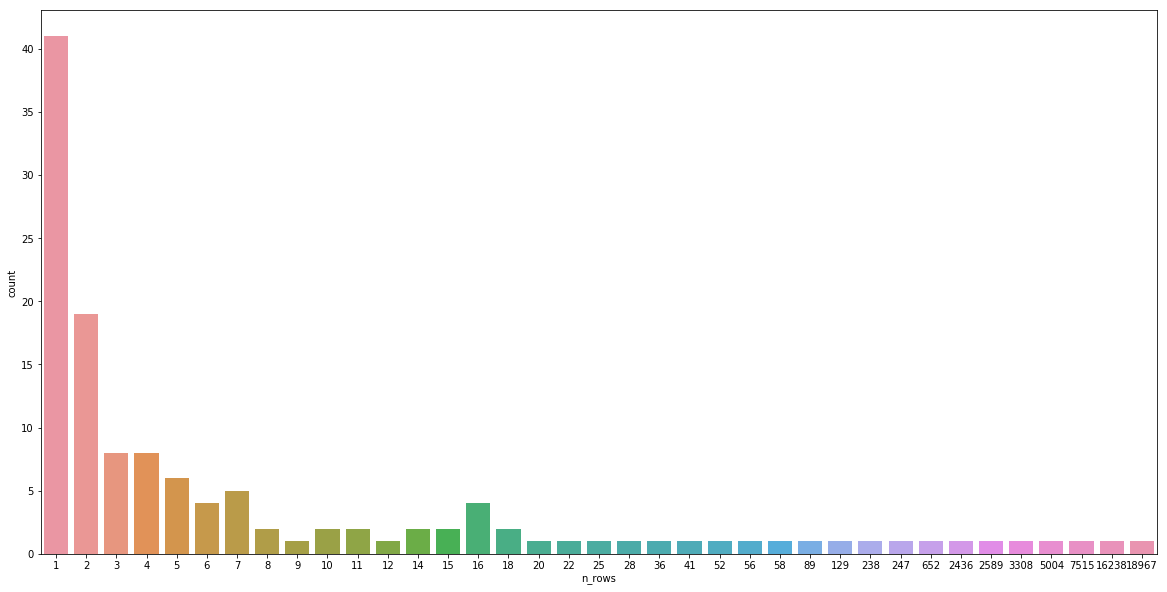

In [213]:
#Counting places 
plt.figure(figsize=(20, 10))
sns.countplot('n_rows',data=n_city_zipcode)
plt.show()

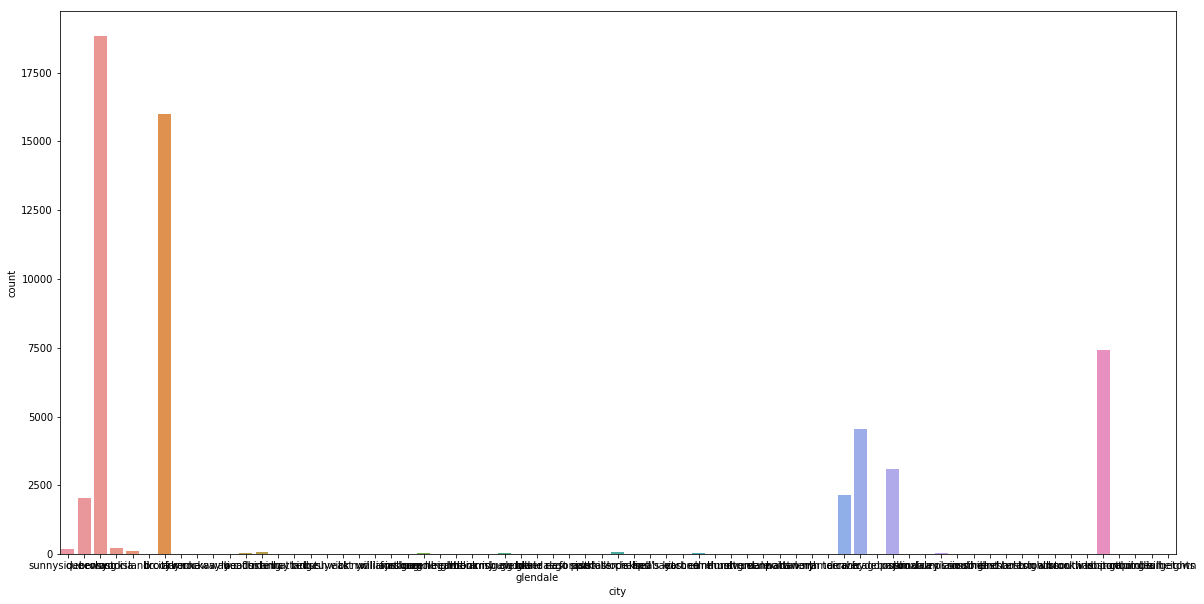

In [214]:

plt.figure(figsize=(20, 10))
sns.countplot('city',data=listings_filt2)
plt.show()

In [215]:
listings_filt2[listings_filt2['property_type'] == "Apartment"]

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,host_id,id,instant_bookable,latitude,longitude,metropolitan,name,price,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode,zipcode_clean,num_properties
46,8.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",12,1.0,Real Bed,1.0,3.0,strict,sunnysidebronx,NaN,873273,182177,t,40.864658,-73.857087,NYC,PRIVATE FLAT / APARTMENT- $SPECIAL$,125.0,Apartment,10.0,9.0,10.0,9.0,92.0,9.0,Entire home/apt,NY,NaN,10469,10469,50
52,2.0,"{TV,Kitchen,""Free parking on premises"",Heating...",0,1.0,Real Bed,1.0,1.0,flexible,sunnysidebronx,NaN,32076760,16604416,t,40.865529,-73.852008,NYC,Quiet peaceful studio apartment,100.0,Apartment,NaN,NaN,NaN,NaN,NaN,NaN,Private room,NY,NaN,10469,10469,50
54,2.0,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",28,1.0,Real Bed,1.0,2.0,strict,sunnysidebronx,NaN,17315252,3435196,f,40.864022,-73.853892,NYC,"Cozy and Cool, Beautiful Old Brick!",45.0,Apartment,10.0,9.0,10.0,9.0,89.0,10.0,Private room,NY,NaN,10469,10469,50
55,16.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",22,1.0,Real Bed,2.0,4.0,strict,sunnysidebronx,NaN,23732730,5046189,f,40.870541,-73.846807,NYC,Peace & Tranquility,150.0,Apartment,10.0,9.0,10.0,9.0,95.0,9.0,Entire home/apt,NY,NaN,10469,10469,50
57,2.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",0,1.0,Real Bed,1.0,1.0,strict,sunnysidebronx,NaN,3213737,13864221,f,40.860659,-73.854137,NYC,"Live, Love, Stay in the Bronx!",50.0,Apartment,10.0,10.0,10.0,9.0,96.0,9.0,Private room,NY,NaN,10469,10469,50
60,1.0,"{""Air conditioning"",Kitchen,""Free parking on p...",14,1.0,Real Bed,1.0,1.0,strict,sunnysidebronx,NaN,33748937,17042247,t,40.868056,-73.838575,NYC,Cozy Bronx Room near NYC,47.0,Apartment,NaN,NaN,NaN,NaN,NaN,NaN,Private room,NY,NaN,10469,10469,50
61,2.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",6,1.0,Real Bed,1.0,1.0,strict,sunnysidebronx,NaN,57165692,11020169,t,40.872234,-73.843353,NYC,Luxurious one bedroom apartment,79.0,Apartment,10.0,10.0,10.0,9.0,97.0,10.0,Entire home/apt,NY,NaN,10469,10469,50
64,1.0,"{""Air conditioning"",Kitchen,Heating,""Smoke det...",29,1.0,Real Bed,1.0,1.0,strict,sunnysidebronx,NaN,127849010,18443397,t,40.868004,-73.838710,NYC,"Private, Clean Cozy Room",47.0,Apartment,NaN,NaN,NaN,NaN,NaN,NaN,Private room,NY,NaN,10469,10469,50
65,2.0,"{""Air conditioning"",Kitchen,""Free parking on p...",22,1.0,Real Bed,1.0,1.0,strict,sunnysidebronx,NaN,127846277,18443461,t,40.868575,-73.838880,NYC,Clean Master Bedroom w/ Private Full Bathroom,57.0,Apartment,NaN,NaN,NaN,NaN,NaN,NaN,Private room,NY,NaN,10469,10469,50
70,6.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",0,1.0,Real Bed,1.0,3.0,flexible,sunnysidebronx,NaN,108700837,16527719,t,40.860299,-73.833943,NYC,NYC Private 1BR Suite. Private Kitch/Bath. Par...,70.0,Apartment,10.0,10.0,10.0,10.0,100.0,10.0,Entire home/apt,NY,NaN,10469,10469,50


In [216]:
#listings.groupby(["property_type", "zipcode"])["price"].describe().sort_values(by="std")
(listings_filt2
 .groupby(["property_type", "zipcode"])["price"]
 .describe()
 .sort_values(by=["count", "std"], ascending = False))

count        mean   ...       75%     max
property_type zipcode                       ...                  
Apartment     11211    1835.0  136.232153   ...    175.00  2500.0
              11206    1205.0   92.582573   ...    103.00  1300.0
              10002    1196.0  177.155518   ...    189.00  9999.0
              10009    1112.0  160.867806   ...    195.00  1700.0
              11221    1094.0   83.946984   ...     99.00  1115.0
              11216     966.0  102.040373   ...    120.00  2000.0
              20009     931.0  202.537057   ...    195.00  3200.0
              11238     924.0  121.719697   ...    149.25  6500.0
              10025     904.0  161.917035   ...    170.00  9998.0
              11222.0   817.0  117.685435   ...    150.00   750.0
...                       ...         ...   ...       ...     ...
Townhouse     11236       1.0  169.000000   ...    169.00   169.0
              11249       1.0  500.000000   ...    500.00   500.0
              11377       1.0   95.000000   ...     95.00    95.0
              11434.0     1.0   86.000000   ...     86.00    86.0
              60640       1.0  225.000000   ...    225.00   225.0
              60654       1.0  105.000000   ...    105.00   105.0
              60660       1.0  150.000000   ...    150.00   150.0
              80202.0     1.0  485.000000   ...    485.00   485.0
              80207.0     1.0   98.000000   ...     98.00    98.0
              80210.0     1.0  120.000000   ...    120.00   120.0

[936 rows x 8 columns]

In [16]:
listings_filt2.groupby("property_type")["price"].count()

property_type
Apartment             46149
Bed & Breakfast         339
Boat                     38
Boutique hotel           42
Bungalow                 33
Cabin                     5
Camper/RV                 8
Castle                    7
Cave                      2
Chalet                    1
Condominium            1723
Dorm                     72
Earth House               3
Entire Floor              4
Guest suite              25
Guesthouse               77
Hostel                   27
House                  8466
Hut                       1
In-law                   15
Island                    1
Lighthouse                1
Loft                   1109
Other                   300
Serviced apartment       10
Tent                      1
Timeshare                43
Townhouse              1282
Train                     2
Treehouse                 2
Vacation home             2
Villa                    30
Name: price, dtype: int64